In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# 1. Basic Inspection
#print("First 5 Rows:\n", df.head())
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# 2. Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# 3. Descriptive Statistics
print("\nSummary Stats:\n", df.describe())


Summary Stats:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# 4. Unique Values in Species
print("\nUnique Species:\n", df['species'].unique())


Unique Species:
 ['setosa' 'versicolor' 'virginica']


In [7]:
# 5. Class distribution
print("\nClass Distribution:\n", df['species'].value_counts())


Class Distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


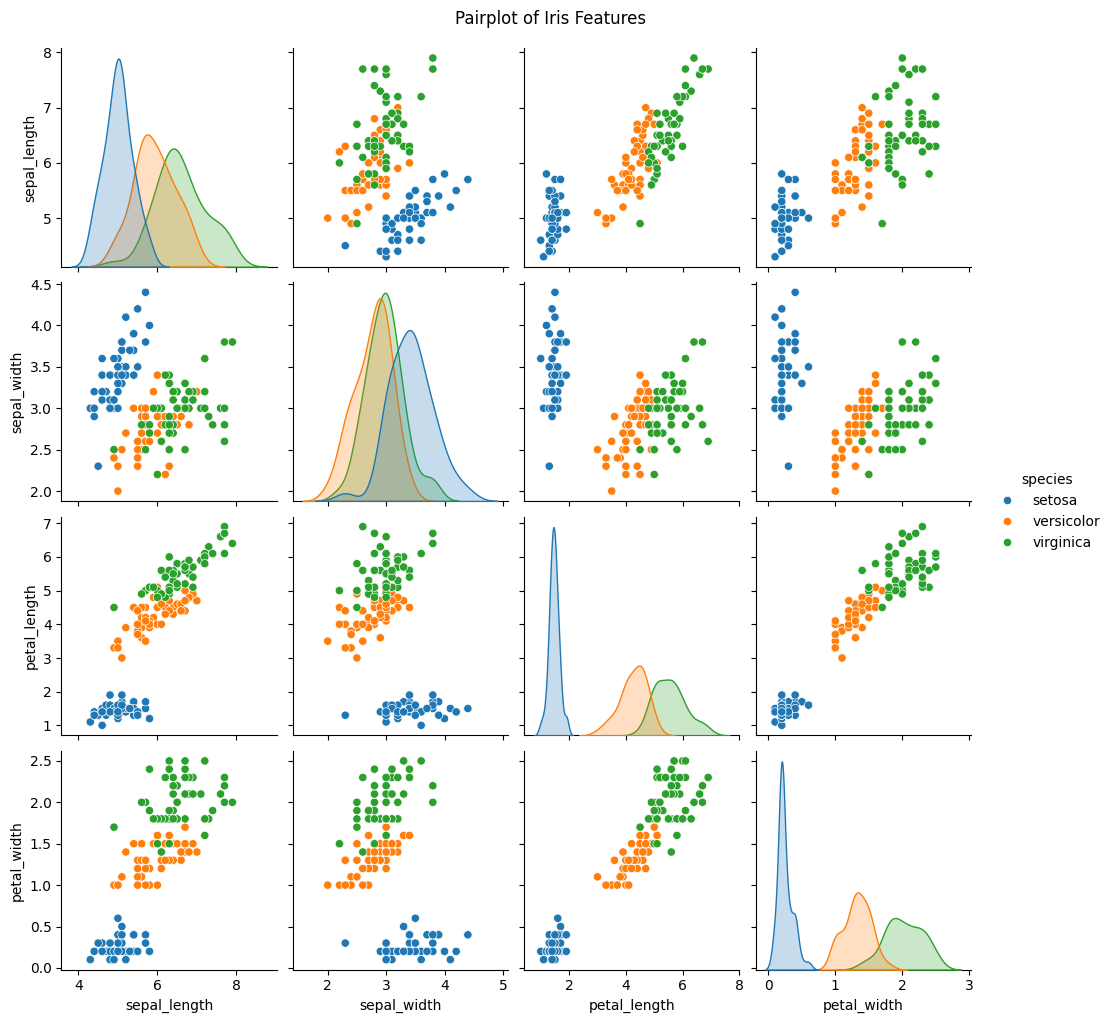

In [8]:
# 6. Pairplot for Feature Relationships
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [9]:
#features/input columns/Independant variables
#class/label/output variable/Dependant variable.

#Multicollinearity occurs when two or more independent variables are highly correlated with each other, and it is not good in regression analysis.
#it is good to have strong corelation between dependant and independant variable.

# 7. Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


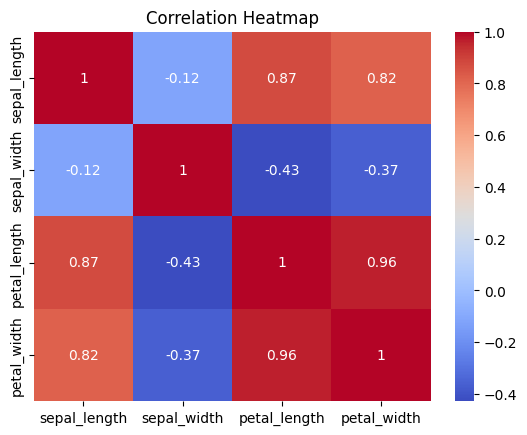

In [10]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

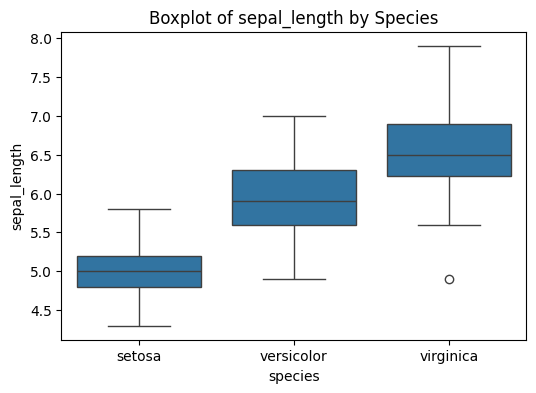

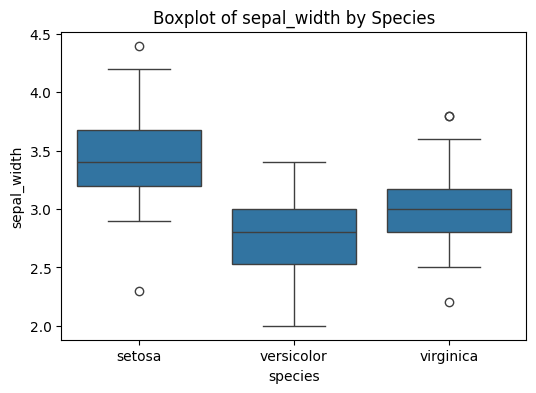

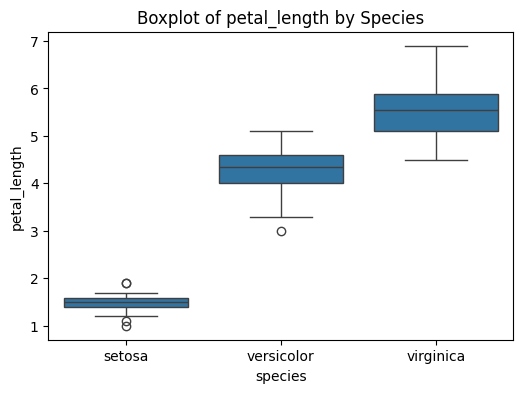

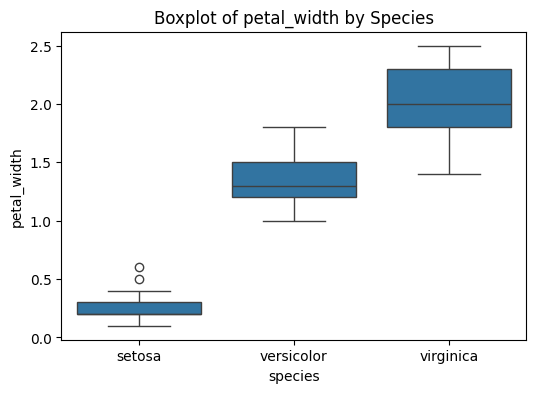

In [11]:
# 9. Boxplots for each feature
features = df.columns[:-1]
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')
    plt.show()

In [12]:
# 10. NumPy-based Insight: Mean and Std
feature_array = df.iloc[:, :-1].values  # only numeric features
mean_values = np.mean(feature_array, axis=0)
std_dev_values = np.std(feature_array, axis=0)
print("\nMean of Features (NumPy):", mean_values)
print("Standard Deviation of Features (NumPy):", std_dev_values)


Mean of Features (NumPy): [5.84333333 3.05733333 3.758      1.19933333]
Standard Deviation of Features (NumPy): [0.82530129 0.43441097 1.75940407 0.75969263]
